In [1]:
import numpy as np
import pandas as pd

## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import folium
import folium.plugins
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, plot_confusion_matrix, roc_auc_score, balanced_accuracy_score, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
import joblib
import shap  
import graphviz
import eli5


In [2]:
df = pd.read_csv("US_Accidents_Dec20_updated.csv")
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [3]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


Data preprocessing

In [4]:
# drop irrelevant columns
irrelavant_columns = ['ID','Description','Country','Weather_Timestamp']
df = df.drop(irrelavant_columns, axis=1)
df.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Street,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,NaN,Outerbelt E,...,False,False,False,False,False,False,Night,Night,Night,Night
1,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,NaN,I-70 E,...,False,False,False,False,False,False,Night,Night,Night,Night
2,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,NaN,I-75 S,...,False,False,False,False,False,False,Night,Night,Night,Day
3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,NaN,US-50 E,...,False,False,False,False,False,False,Night,Night,Night,Day
4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,NaN,I-77 N,...,False,False,False,False,False,False,Night,Night,Day,Day


In [5]:
df.replace("", float("NaN"), inplace=True)
df.replace(" ", float("NaN"), inplace=True)
 
missing_value = df.isna().sum() / df.shape[0] * 100
missing_value_df = pd.DataFrame(missing_value.sort_values(ascending=False), columns=['Missing%'])
missing_value_df

,Missing%
Number,69.000715
Precipitation(in),33.675953
Wind_Chill(F),29.637007
Wind_Speed(mph),8.499773
Humidity(%),3.001786
Visibility(mi),2.916170
Weather_Condition,2.902714
Temperature(F),2.838469
Wind_Direction,2.760965
Pressure(in),2.392643


In [6]:
missing_value_30 = missing_value_df[missing_value_df['Missing%'] > 30]
df.drop(missing_value_30.index, axis=1, inplace=True)
missing_value_30

,Missing%
Number,69.000715
Precipitation(in),33.675953


In [7]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"])

df["Year"] = df["Start_Time"].dt.year
df["Month"] = df["Start_Time"].dt.month
df["Weekday"] = df["Start_Time"].dt.weekday
df["Day"] = df["Start_Time"].dt.day

df["Hour"] = df["Start_Time"].dt.hour
df["Minute"] = df["Start_Time"].dt.minute

df.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Street,Side,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Weekday,Day,Hour,Minute
0,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Outerbelt E,R,...,Night,Night,Night,Night,2016,2,0,8,0,37
1,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,I-70 E,R,...,Night,Night,Night,Night,2016,2,0,8,5,56
2,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,I-75 S,R,...,Night,Night,Night,Day,2016,2,0,8,6,15
3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,US-50 E,R,...,Night,Night,Night,Day,2016,2,0,8,6,15
4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,I-77 N,R,...,Night,Night,Day,Day,2016,2,0,8,6,51


In [8]:
dropNaN_df = df.dropna()
dropNaN_df.reset_index(drop=True, inplace=True)
dropNaN_df.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Street,Side,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Weekday,Day,Hour,Minute
0,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Outerbelt E,R,...,Night,Night,Night,Night,2016,2,0,8,0,37
1,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,I-75 S,R,...,Day,Day,Day,Day,2016,2,0,8,7,53
2,2,2016-02-08 08:16:57,2016-02-08 14:16:57,39.063240,-84.032430,39.067310,-84.058510,1.427,State Route 32,R,...,Day,Day,Day,Day,2016,2,0,8,8,16
3,2,2016-02-08 08:16:57,2016-02-08 14:16:57,39.067080,-84.058550,39.063020,-84.032540,1.423,State Route 32,R,...,Day,Day,Day,Day,2016,2,0,8,8,16
4,2,2016-02-08 11:51:46,2016-02-08 17:51:46,41.375310,-81.820170,41.367860,-81.821740,0.521,I-71 S,R,...,Day,Day,Day,Day,2016,2,0,8,11,51


In [9]:
data_processed_set = dropNaN_df
data_processed_set.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Street,Side,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Weekday,Day,Hour,Minute
0,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Outerbelt E,R,...,Night,Night,Night,Night,2016,2,0,8,0,37
1,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,I-75 S,R,...,Day,Day,Day,Day,2016,2,0,8,7,53
2,2,2016-02-08 08:16:57,2016-02-08 14:16:57,39.063240,-84.032430,39.067310,-84.058510,1.427,State Route 32,R,...,Day,Day,Day,Day,2016,2,0,8,8,16
3,2,2016-02-08 08:16:57,2016-02-08 14:16:57,39.067080,-84.058550,39.063020,-84.032540,1.423,State Route 32,R,...,Day,Day,Day,Day,2016,2,0,8,8,16
4,2,2016-02-08 11:51:46,2016-02-08 17:51:46,41.375310,-81.820170,41.367860,-81.821740,0.521,I-71 S,R,...,Day,Day,Day,Day,2016,2,0,8,11,51


Feature Engineering

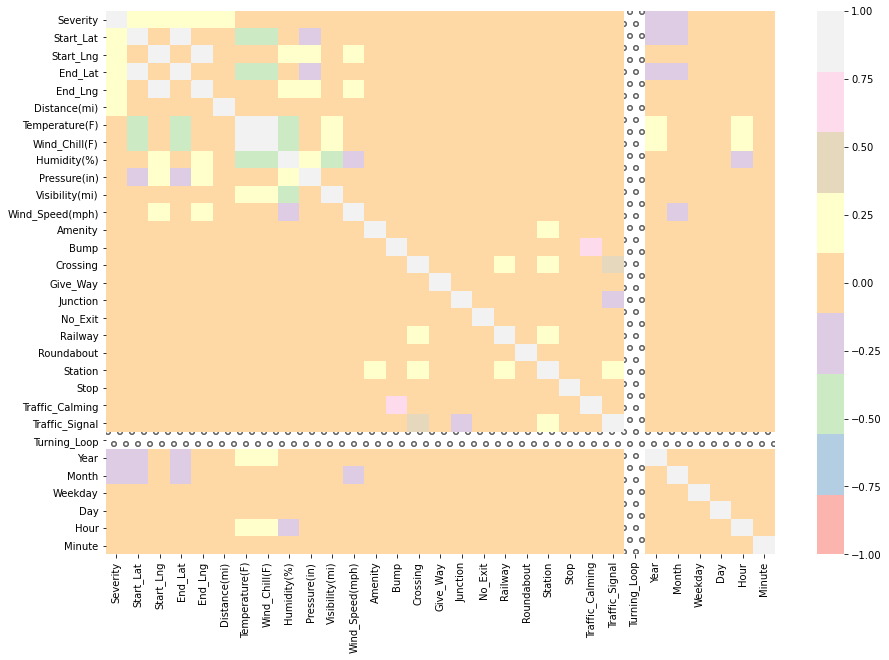

In [10]:
corr_matrix = data_processed_set.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap="Pastel1")
plt.gca().patch.set(hatch="data_processed_set")
plt.show()

In [11]:
relevant_features = ['Severity', 'Start_Lat', 'Start_Lng',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Civil_Twilight','Year', 'Month', 'Weekday', 'Day', 'Hour', 'Minute']
data_modelling_df = data_processed_set[relevant_features].copy()

In [12]:
data_modelling_df.head()

,Severity,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,...,Traffic_Calming,Traffic_Signal,Turning_Loop,Civil_Twilight,Year,Month,Weekday,Day,Hour,Minute
0,3,40.108910,-83.092860,42.1,58.0,29.76,10.0,SW,10.4,Light Rain,...,False,False,False,Night,2016,2,0,8,0,37
1,3,39.172393,-84.492792,37.0,93.0,29.69,10.0,WSW,10.4,Light Rain,...,False,False,False,Day,2016,2,0,8,7,53
2,2,39.063240,-84.032430,35.6,100.0,29.66,10.0,WSW,8.1,Overcast,...,False,True,False,Day,2016,2,0,8,8,16
3,2,39.067080,-84.058550,35.6,100.0,29.66,10.0,WSW,8.1,Overcast,...,False,False,False,Day,2016,2,0,8,8,16
4,2,41.375310,-81.820170,33.1,92.0,29.63,0.5,SW,3.5,Snow,...,False,False,False,Day,2016,2,0,8,11,51


In [13]:
one_hot_features = ['Wind_Direction', 'Weather_Condition']

data_modelling_df.loc[data_modelling_df['Wind_Direction'].str.startswith('C'), 'Wind_Direction'] = 'C' #Calm
data_modelling_df.loc[data_modelling_df['Wind_Direction'].str.startswith('E'), 'Wind_Direction'] = 'E' #East, ESE, ENE
data_modelling_df.loc[data_modelling_df['Wind_Direction'].str.startswith('W'), 'Wind_Direction'] = 'W' #West, WSW, WNW
data_modelling_df.loc[data_modelling_df['Wind_Direction'].str.startswith('S'), 'Wind_Direction'] = 'S' #South, SSW, SSE
data_modelling_df.loc[data_modelling_df['Wind_Direction'].str.startswith('N'), 'Wind_Direction'] = 'N' #North, NNW, NNE
data_modelling_df.loc[data_modelling_df['Wind_Direction'].str.startswith('V'), 'Wind_Direction'] = 'V' #Variable

In [14]:
data_modelling_df['Weather_Fair'] = np.where(data_modelling_df['Weather_Condition'].str.contains('Fair', case=False, na = False), 1, 0)
data_modelling_df['Weather_Cloudy'] = np.where(data_modelling_df['Weather_Condition'].str.contains('Cloudy', case=False, na = False), 1, 0)
data_modelling_df['Weather_Clear'] = np.where(data_modelling_df['Weather_Condition'].str.contains('Clear', case=False, na = False), 1, 0)
data_modelling_df['Weather_Overcast'] = np.where(data_modelling_df['Weather_Condition'].str.contains('Overcast', case=False, na = False), 1, 0)
data_modelling_df['Weather_Snow'] = np.where(data_modelling_df['Weather_Condition'].str.contains('Snow|Wintry|Sleet', case=False, na = False), 1, 0)
data_modelling_df['Weather_Haze'] = np.where(data_modelling_df['Weather_Condition'].str.contains('Smoke|Fog|Mist|Haze', case=False, na = False), 1, 0)
data_modelling_df['Weather_Rain'] = np.where(data_modelling_df['Weather_Condition'].str.contains('Rain|Drizzle|Showers', case=False, na = False), 1, 0)
data_modelling_df['Weather_Thunderstorm'] = np.where(data_modelling_df['Weather_Condition'].str.contains('Thunderstorms|T-Storm', case=False, na = False), 1, 0)
data_modelling_df['Weather_Windy'] = np.where(data_modelling_df['Weather_Condition'].str.contains('Windy|Squalls', case=False, na = False), 1, 0)
data_modelling_df['Weather_Hail'] = np.where(data_modelling_df['Weather_Condition'].str.contains('Hail|Ice Pellets', case=False, na = False), 1, 0)
data_modelling_df['Weather_Thunder'] = np.where(data_modelling_df['Weather_Condition'].str.contains('Thunder', case=False, na = False), 1, 0)
data_modelling_df['Weather_Dust'] = np.where(data_modelling_df['Weather_Condition'].str.contains('Dust', case=False, na = False), 1, 0)
data_modelling_df['Weather_Tornado'] = np.where(data_modelling_df['Weather_Condition'].str.contains('Tornado', case=False, na = False), 1, 0)

In [15]:
onehot_df = pd.get_dummies(data_modelling_df['Wind_Direction'], prefix='Wind')
data_modelling_df = pd.concat([data_modelling_df, onehot_df], axis=1)
data_modelling_df.drop(one_hot_features, axis=1, inplace=True)

In [16]:
label_encoding_features = ['Amenity','Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway','Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal','Turning_Loop', 'Civil_Twilight']

for feature in label_encoding_features:
    data_modelling_df[feature] = LabelEncoder().fit_transform(data_modelling_df[feature])

In [17]:
data_modelling_df.head()

,Severity,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Amenity,Bump,...,Weather_Hail,Weather_Thunder,Weather_Dust,Weather_Tornado,Wind_C,Wind_E,Wind_N,Wind_S,Wind_V,Wind_W
0,3,40.108910,-83.092860,42.1,58.0,29.76,10.0,10.4,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3,39.172393,-84.492792,37.0,93.0,29.69,10.0,10.4,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,39.063240,-84.032430,35.6,100.0,29.66,10.0,8.1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2,39.067080,-84.058550,35.6,100.0,29.66,10.0,8.1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2,41.375310,-81.820170,33.1,92.0,29.63,0.5,3.5,0,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
data_modelling_df.to_csv('preprocessed_data.csv', index = False)

In [19]:
X = data_modelling_df.drop("Severity", axis=1)
Y = data_modelling_df.Severity
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=0, stratify=Y)
print(f'Train: {x_train.shape} \n Test: {x_test.shape}')
cla_feature_names = x_train.columns.tolist()

Train: (741197, 46) 
 Test: (317656, 46)


In [23]:
#Dealing with unbalanced data
train_set = pd.concat([x_train, y_train], axis=1)
train_set_over = pd.DataFrame()
train_set_under = pd.DataFrame()

for i in range(1,5):
    class_df = train_set[train_set["Severity"]==i]
    train_set_over = train_set_over.append(class_df.sample(len(train_set[train_set["Severity"]==2].index), random_state=1, replace=True))
    train_set_under = train_set_under.append(class_df.sample(len(train_set[train_set["Severity"]==1].index), random_state=1, replace=False))

print(f'Over-sampling: \n{train_set_over.Severity.value_counts()}')
print(f'Under-sampling: \n{train_set_under.Severity.value_counts()}')


Over-sampling: 
1    620563
2    620563
3    620563
4    620563
Name: Severity, dtype: int64
Under-sampling: 
1    19302
2    19302
3    19302
4    19302
Name: Severity, dtype: int64


In [24]:
train_set_over 

,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Amenity,Bump,Crossing,...,Weather_Thunder,Weather_Dust,Weather_Tornado,Wind_C,Wind_E,Wind_N,Wind_S,Wind_V,Wind_W,Severity
551118,38.761980,-77.460080,60.0,60.0,30.10,10.0,16.0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
558601,32.400330,-111.131680,84.0,11.0,27.37,10.0,8.0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
555914,41.140290,-87.265920,61.0,88.0,29.23,10.0,5.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
690448,32.250220,-110.986500,78.0,15.0,27.15,10.0,8.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
696542,32.206370,-110.823840,79.0,21.0,27.20,10.0,7.0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672442,34.564650,-111.900150,44.0,49.0,24.97,10.0,5.0,0,0,0,...,0,0,0,0,0,0,1,0,0,4
918990,39.619760,-89.647150,36.0,62.0,30.33,10.0,3.5,0,0,0,...,0,0,0,0,0,0,1,0,0,4
18500,41.463557,-82.053729,32.0,75.0,30.13,6.0,4.6,0,0,0,...,0,0,0,0,0,1,0,0,0,4
1048562,41.897850,-72.288010,61.0,90.0,29.86,10.0,5.0,0,0,0,...,0,0,0,0,0,1,0,0,0,4


In [25]:
train_set_under

,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Amenity,Bump,Crossing,...,Weather_Thunder,Weather_Dust,Weather_Tornado,Wind_C,Wind_E,Wind_N,Wind_S,Wind_V,Wind_W,Severity
567857,28.506030,-81.330980,95.0,44.0,30.01,10.0,3.0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
653248,37.563360,-77.484210,53.0,69.0,29.69,10.0,6.0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
547330,33.541130,-86.643140,70.0,90.0,29.15,10.0,5.0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
585304,33.566770,-112.224600,68.0,14.0,28.89,10.0,5.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
590417,33.446410,-112.069950,77.0,18.0,28.71,10.0,0.0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18520,39.848326,-83.122025,44.6,46.0,30.12,10.0,12.7,0,0,0,...,0,0,0,0,0,0,0,0,1,4
961889,40.849693,-74.354022,32.0,100.0,29.60,0.5,11.5,0,0,0,...,0,0,0,0,0,1,0,0,0,4
770369,30.299670,-99.324150,44.0,96.0,28.40,4.0,6.0,0,0,0,...,0,0,0,0,0,1,0,0,0,4
355363,37.262079,-78.681804,54.0,33.0,29.46,10.0,5.0,0,0,0,...,0,0,0,0,0,1,0,0,0,4


In [28]:
X_over = train_set_over.drop("Severity", axis=1)
Y_over = train_set_over.Severity
x_train_over, x_test_over, y_train_over, y_test_over = train_test_split(X_over, Y_over, test_size = 0.3, random_state=0, stratify=Y_over)

In [30]:
X_under = train_set_under.drop("Severity", axis=1)
Y_under = train_set_under.Severity
x_train_under, x_test_under, y_train_under, y_test_under = train_test_split(X_under, Y_under, test_size = 0.3, random_state=0, stratify=Y_under)

Training models

In [33]:
# Logistic Regression
logistic_reg = LogisticRegression(C=10, fit_intercept=False, solver='liblinear')
logistic_reg.fit(x_train, y_train)
logistic_reg_predictions = logistic_reg.predict(x_test)
logistic_reg_results = classification_report(y_test, logistic_reg_predictions, zero_division=True, output_dict=True)

print(classification_report(y_test, logistic_reg_predictions, zero_division=True))
logistic_balanced_accuracy = balanced_accuracy_score(y_test, logistic_reg_predictions)
print(f'balanced_accuracy: {logistic_balanced_accuracy}')

logistic_roc_ovo_macro = roc_auc_score(y_test, logistic_reg.predict_proba(x_test), multi_class='ovo', average='macro') 
logistic_roc_ovr_weighted = roc_auc_score(y_test, logistic_reg.predict_proba(x_test), multi_class='ovr', average='weighted') 
print(f"roc_ovo_macro: {logistic_roc_ovo_macro}") 
print(f"roc_ovr_weighted: {logistic_roc_ovr_weighted}")

eli5.show_weights(logistic_reg, feature_names = cla_feature_names)

              precision    recall  f1-score   support

           1       0.55      0.04      0.07      8272
           2       0.84      0.99      0.91    265956
           3       0.25      0.02      0.04     25418
           4       0.36      0.00      0.01     18010

    accuracy                           0.84    317656
   macro avg       0.50      0.27      0.26    317656
weighted avg       0.76      0.84      0.77    317656

balanced_accuracy: 0.26506336976743794
roc_ovo_macro: 0.7472357271996429
roc_ovr_weighted: 0.7941969406650723


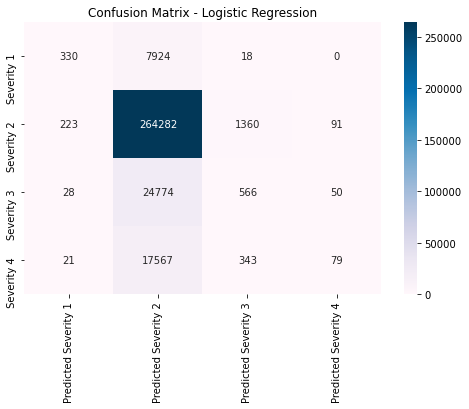

In [46]:
y_pred = logistic_reg_predictions = logistic_reg.predict(x_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

index = ["Severity 1", "Severity 2", "Severity 3", " Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="PuBu")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [ ]:
# SVC
svc = SVC(C=10, gamma=0.1, probability=True, kernel='rbf')
svc.fit(x_train, y_train)
svc_predictions = svc.predict(x_test)
svc_results = classification_report(y_test, svc_predictions, zero_division=True, output_dict=True)

print(classification_report(y_test, svc_predictions, zero_division=True))

svc_balanced_accuracy = balanced_accuracy_score(y_test, svc_predictions)
print(f'balanced_accuracy: {svc_balanced_accuracy}')

svc_roc_ovo_macro = roc_auc_score(y_test, svc.predict_proba(x_test), multi_class='ovo', average='macro') 
svc_roc_ovr_weighted = roc_auc_score(y_test, svc.predict_proba(x_test), multi_class='ovr', average='weighted') 
print(f"roc_ovo_macro: {svc_roc_ovo_macro}") 
print(f"roc_ovr_weighted: {svc_roc_ovr_weighted}")


In [37]:
# Decision Tree 
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train, y_train)
dt_predictions = dt.predict(x_test)
dt_results = classification_report(y_test, dt_predictions, zero_division=True, output_dict=True)

print(classification_report(y_test, dt_predictions, zero_division=True))

dt_balanced_accuracy = balanced_accuracy_score(y_test, dt_predictions)
print(f'balanced_accuracy: {dt_balanced_accuracy}')

dt_roc_ovo_macro = roc_auc_score(y_test, dt.predict_proba(x_test), multi_class='ovo', average='macro') 
dt_roc_ovr_weighted = roc_auc_score(y_test, dt.predict_proba(x_test), multi_class='ovr', average='weighted') 
print(f"roc_ovo_macro: {dt_roc_ovo_macro}") 
print(f"roc_ovr_weighted: {dt_roc_ovr_weighted}")


              precision    recall  f1-score   support

           1       0.64      0.66      0.65      8272
           2       0.94      0.93      0.94    265956
           3       0.55      0.57      0.56     25418
           4       0.50      0.53      0.52     18010

    accuracy                           0.87    317656
   macro avg       0.66      0.67      0.67    317656
weighted avg       0.88      0.87      0.88    317656

balanced_accuracy: 0.6722977697467953
roc_ovo_macro: 0.7843681358500428
roc_ovr_weighted: 0.8092112947087159


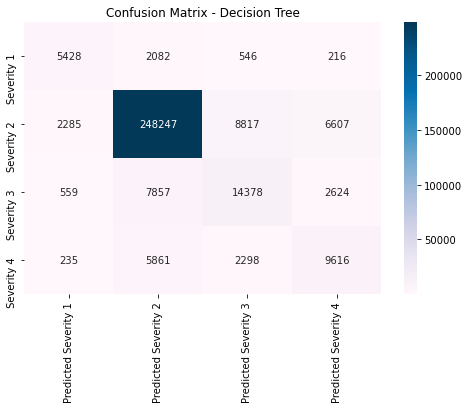

In [45]:
y_pred = dt.predict(x_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

index = ["Severity 1", "Severity 2", "Severity 3", " Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="PuBu")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [47]:
# Decision Tree with oversampling
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train_over, y_train_over)
dt_predictions = dt.predict(x_test_over)
dt_results = classification_report(y_test_over, dt_predictions, zero_division=True, output_dict=True)

print(classification_report(y_test_over, dt_predictions, zero_division=True))

dt_balanced_accuracy = balanced_accuracy_score(y_test_over, dt_predictions)
print(f'balanced_accuracy: {dt_balanced_accuracy}')


              precision    recall  f1-score   support

           1       0.99      1.00      1.00    186169
           2       1.00      0.94      0.97    186169
           3       0.97      1.00      0.99    186169
           4       0.98      1.00      0.99    186169

    accuracy                           0.99    744676
   macro avg       0.99      0.99      0.99    744676
weighted avg       0.99      0.99      0.99    744676

balanced_accuracy: 0.9853896191095188


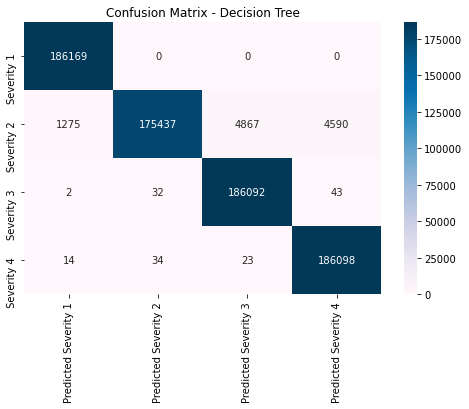

In [48]:
y_pred = dt.predict(x_test_over)
confmat = confusion_matrix(y_true=y_test_over, y_pred=y_pred)

index = ["Severity 1", "Severity 2", "Severity 3", " Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="PuBu")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [49]:
# Decision Tree with undersampling
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train_under, y_train_under)
dt_predictions = dt.predict(x_test_under)
dt_results = classification_report(y_test_under, dt_predictions, zero_division=True, output_dict=True)

print(classification_report(y_test_under, dt_predictions, zero_division=True))

dt_balanced_accuracy = balanced_accuracy_score(y_test_under, dt_predictions)
print(f'balanced_accuracy: {dt_balanced_accuracy}')


              precision    recall  f1-score   support

           1       0.84      0.84      0.84      5791
           2       0.70      0.69      0.70      5791
           3       0.60      0.60      0.60      5790
           4       0.57      0.58      0.58      5791

    accuracy                           0.68     23163
   macro avg       0.68      0.68      0.68     23163
weighted avg       0.68      0.68      0.68     23163

balanced_accuracy: 0.6777152415352392


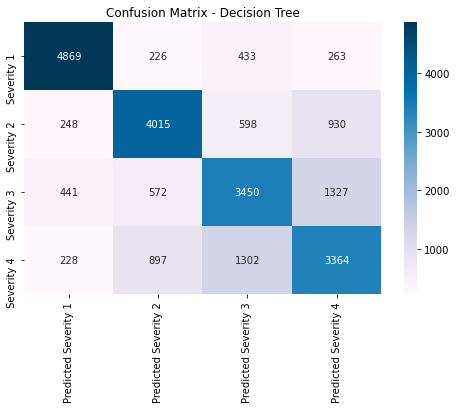

In [50]:
y_pred = dt.predict(x_test_under)
confmat = confusion_matrix(y_true=y_test_under, y_pred=y_pred)

index = ["Severity 1", "Severity 2", "Severity 3", " Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="PuBu")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [23]:
joblib.dump(dt, 'dt.pkl')

['dt.pkl']

In [51]:
# Random Forest 
rf = RandomForestClassifier(random_state=0)
rf.fit(x_train, y_train)
rf_predictions = rf.predict(x_test)
rf_results = classification_report(y_test, rf_predictions, zero_division=True, output_dict=True)

print(classification_report(y_test, rf_predictions, zero_division=True))

rf_balanced_accuracy = balanced_accuracy_score(y_test, rf_predictions)
print(f'balanced_accuracy: {rf_balanced_accuracy}')

rf_roc_ovo_macro = roc_auc_score(y_test, rf.predict_proba(x_test), multi_class='ovo', average='macro')
rf_roc_ovr_weighted = roc_auc_score(y_test, rf.predict_proba(x_test), multi_class='ovr', average='weighted') 
print(f"roc_ovo_macro: {rf_roc_ovo_macro}") 
print(f"roc_ovr_weighted: {rf_roc_ovr_weighted}")


              precision    recall  f1-score   support

           1       0.82      0.58      0.68      8272
           2       0.92      0.98      0.95    265956
           3       0.76      0.52      0.62     25418
           4       0.75      0.44      0.55     18010

    accuracy                           0.90    317656
   macro avg       0.81      0.63      0.70    317656
weighted avg       0.89      0.90      0.89    317656

balanced_accuracy: 0.6307936968802745
roc_ovo_macro: 0.9290173069172042
roc_ovr_weighted: 0.94542683368176


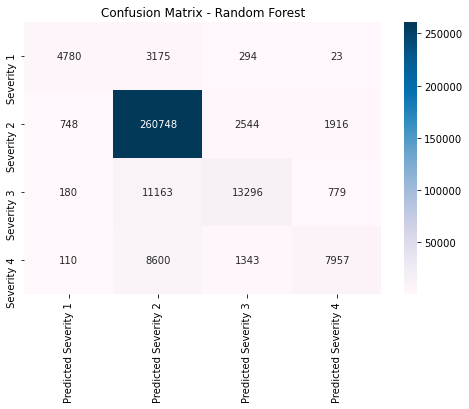

In [52]:
y_pred = rf.predict(x_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

index = ["Severity 1", "Severity 2", "Severity 3", " Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="PuBu")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [53]:
# Random Forest with oversampling
rf = RandomForestClassifier(random_state=0)
rf.fit(x_train_over, y_train_over)
rf_predictions = rf.predict(x_test_over)
rf_results = classification_report(y_test_over, rf_predictions, zero_division=True, output_dict=True)

print(classification_report(y_test_over, rf_predictions, zero_division=True))

rf_balanced_accuracy = balanced_accuracy_score(y_test_over, rf_predictions)
print(f'balanced_accuracy: {rf_balanced_accuracy}')


              precision    recall  f1-score   support

           1       1.00      1.00      1.00    186169
           2       1.00      0.96      0.98    186169
           3       0.98      1.00      0.99    186169
           4       0.99      1.00      0.99    186169

    accuracy                           0.99    744676
   macro avg       0.99      0.99      0.99    744676
weighted avg       0.99      0.99      0.99    744676

balanced_accuracy: 0.9906039673629874


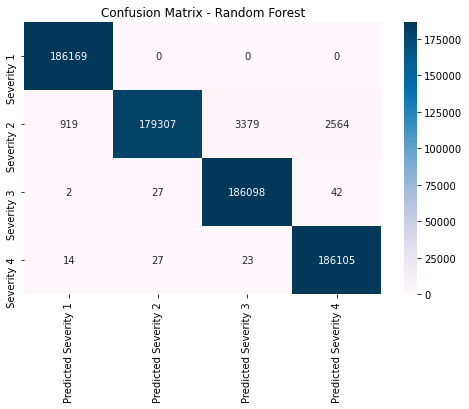

In [54]:
y_pred = rf.predict(x_test_over)
confmat = confusion_matrix(y_true=y_test_over, y_pred=y_pred)

index = ["Severity 1", "Severity 2", "Severity 3", " Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="PuBu")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [55]:
# Random Forest with undersampling
rf = RandomForestClassifier(random_state=0)
rf.fit(x_train_under, y_train_under)
rf_predictions = rf.predict(x_test_under)
rf_results = classification_report(y_test_under, rf_predictions, zero_division=True, output_dict=True)

print(classification_report(y_test_under, rf_predictions, zero_division=True))

rf_balanced_accuracy = balanced_accuracy_score(y_test_under, rf_predictions)
print(f'balanced_accuracy: {rf_balanced_accuracy}')

              precision    recall  f1-score   support

           1       0.82      0.94      0.87      5791
           2       0.79      0.76      0.77      5791
           3       0.67      0.65      0.66      5790
           4       0.66      0.62      0.64      5791

    accuracy                           0.74     23163
   macro avg       0.74      0.74      0.74     23163
weighted avg       0.74      0.74      0.74     23163

balanced_accuracy: 0.7404011614711531


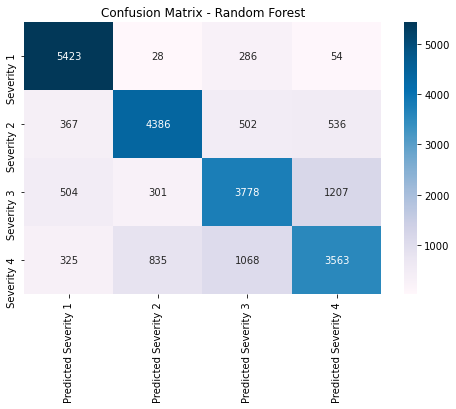

In [56]:
y_pred = rf.predict(x_test_under)
confmat = confusion_matrix(y_true=y_test_under, y_pred=y_pred)

index = ["Severity 1", "Severity 2", "Severity 3", " Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="PuBu")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [42]:
# Gradient Boosting
gbt = GradientBoostingClassifier(learning_rate=0.1, max_depth=10, min_impurity_decrease=0.1, min_samples_leaf=2, n_estimators=100, random_state=0)
gbt.fit(x_train, y_train)
gbt_predictions = gbt.predict(x_test)
gbt_results = classification_report(y_test, gbt_predictions, zero_division=True, output_dict=True)

print(classification_report(y_test, gbt_predictions, zero_division=True))

gbt_balanced_accuracy = balanced_accuracy_score(y_test, gbt_predictions)
print(f'balanced_accuracy: {gbt_balanced_accuracy}')

gbt_roc_ovo_macro = roc_auc_score(y_test, gbt.predict_proba(x_test), multi_class='ovo', average='macro')
gbt_roc_ovr_weighted = roc_auc_score(y_test, gbt.predict_proba(x_test), multi_class='ovr', average='weighted') 
print(f"roc_ovo_macro: {gbt_roc_ovo_macro}") 
print(f"roc_ovr_weighted: {gbt_roc_ovr_weighted}")


              precision    recall  f1-score   support

           1       0.75      0.48      0.59      8272
           2       0.91      0.98      0.94    265956
           3       0.70      0.48      0.57     25418
           4       0.68      0.34      0.45     18010

    accuracy                           0.89    317656
   macro avg       0.76      0.57      0.64    317656
weighted avg       0.88      0.89      0.88    317656

balanced_accuracy: 0.5701888779754795
roc_ovo_macro: 0.9128666278845564
roc_ovr_weighted: 0.9396056997162205


Weight,Feature
0.3134 ± 0.2123,Start_Lng
0.1759 ± 0.1114,Month
0.1736 ± 0.1856,Start_Lat
0.0857 ± 0.0601,Year
0.0517 ± 0.0607,Hour
0.0376 ± 0.0750,Pressure(in)
0.0256 ± 0.0318,Weekday
0.0213 ± 0.0630,Temperature(F)
0.0191 ± 0.0553,Day
0.0163 ± 0.0565,Humidity(%)


In [27]:
# Multi-layer Perceptron classifier. 
mlpc = MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 100), learning_rate='invscaling', random_state = 0)
mlpc.fit(x_train, y_train)
mlpc_predictions = mlpc.predict(x_test)
mlpc_results = classification_report(y_test, mlpc_predictions, zero_division=True, output_dict=True)

print(classification_report(y_test, mlpc_predictions, zero_division=True))

mlpc_balanced_accuracy = balanced_accuracy_score(y_test, mlpc_predictions)
print(f'balanced_accuracy: {mlpc_balanced_accuracy}')

mlpc_roc_ovo_macro = roc_auc_score(y_test, mlpc.predict_proba(x_test), multi_class='ovo', average='macro') 
mlpc_roc_ovr_weighted = roc_auc_score(y_test, mlpc.predict_proba(x_test), multi_class='ovr', average='weighted') 
print(f"roc_ovo_macro: {mlpc_roc_ovo_macro}") 
print(f"roc_ovr_weighted: {mlpc_roc_ovr_weighted}")

              precision    recall  f1-score   support

           1       1.00      0.00      0.00      8272
           2       0.84      1.00      0.91    265956
           3       1.00      0.00      0.00     25418
           4       1.00      0.00      0.00     18010

    accuracy                           0.84    317656
   macro avg       0.96      0.25      0.23    317656
weighted avg       0.86      0.84      0.76    317656

balanced_accuracy: 0.25
roc_ovo_macro: 0.6490938259195304
roc_ovr_weighted: 0.7894909733181882
